In [1]:
import tensorflow as tf

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [4]:
for_hold = trainX.copy()

In [5]:
# Flip random images
for i in range(trainX.shape[0]):
    for_hold[i] = cv2.flip(trainX[i], np.random.randint(-1,3))

In [6]:
trainX = for_hold.copy()

In [7]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [8]:
trainX = trainX/255.0
testY = testY/255.0

In [9]:
model = keras.Sequential()

In [10]:
model.add(layers.Conv2D(16, (3,3), activation='relu', data_format='channels_last', input_shape = (28,28,1)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,  (3,3), data_format='channels_last', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,  (3,3), data_format='channels_last', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [12]:
tf.keras.optimizers.Adam

tensorflow.python.keras.optimizer_v2.adam.Adam

In [13]:
model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
history = model.fit(trainX, trainY ,epochs = 14)

Train on 60000 samples
Epoch 1/14
60000/60000 [==============================] - 21s 346us/sample - loss: 0.5012 - accuracy: 0.8128
Epoch 2/14
60000/60000 [==============================] - 21s 350us/sample - loss: 0.3507 - accuracy: 0.8707
Epoch 3/14
60000/60000 [==============================] - 21s 352us/sample - loss: 0.3024 - accuracy: 0.8890
Epoch 4/14
60000/60000 [==============================] - 21s 350us/sample - loss: 0.2706 - accuracy: 0.9013
Epoch 5/14
60000/60000 [==============================] - 21s 350us/sample - loss: 0.2443 - accuracy: 0.9091
Epoch 6/14
60000/60000 [==============================] - 21s 346us/sample - loss: 0.2217 - accuracy: 0.9173
Epoch 7/14
60000/60000 [==============================] - 21s 346us/sample - loss: 0.2066 - accuracy: 0.9225
Epoch 8/14
60000/60000 [==============================] - 21s 344us/sample - loss: 0.1842 - accuracy: 0.9296
Epoch 9/14
60000/60000 [==============================] - 21s 347us/sample - loss: 0.1675 - accuracy: 0.9

60000/60000 - 4s - loss: 0.0964 - accuracy: 0.9635


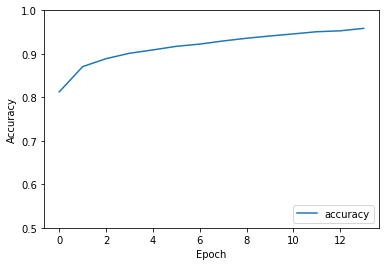

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(trainX, trainY, verbose=2)